In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = load_iris()
columns = data.feature_names

In [4]:
X = data.data
y = data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [7]:
model = tf.keras.Sequential([tf.keras.layers.Dense(3, input_shape=(4,), activation='softmax')])

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100, verbose=0)

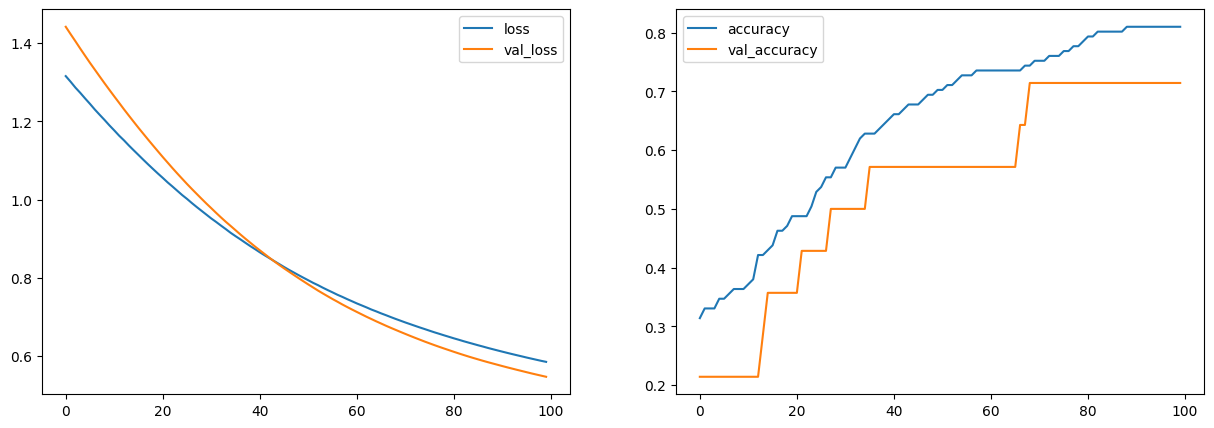

In [27]:
_,(ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
loo = pd.DataFrame(history.history)[['loss', 'val_loss']]
acc = pd.DataFrame(history.history)[['accuracy', 'val_accuracy']]
ax1.plot(loo)
ax1.legend(loo)
ax2.plot(acc)
ax2.legend(acc)

In [28]:
predictions = model.predict(X_test)
np.argmax(predictions, axis =1)

1/1 [==============================] - 0s 79ms/step


array([0, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0])

In [29]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 42ms/step - loss: 0.5335 - accuracy: 0.8667


[0.5334963202476501, 0.8666666746139526]